<a href="https://colab.research.google.com/github/Sergio-Rosales-Soria/CODER/blob/main/ProyectoDS_ParteII_Rosales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Contexto Comercial y Analítico**

El presente informe tiene como objetivo analizar y evaluar las ventas de autos en Estados Unidos, centrándose en modelos, año de fabricación, condición, lugar de venta y datos del comprador. Este análisis se basará en una variedad de factores clave para comprender las tendencias y patrones en el mercado automotriz estadounidense.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

Se espera que, a través del análisis detallado de las ventas de autos por modelo, año, condición y lugar de venta, se identifiquen patrones y tendencias que permitan predecir el precio de las unidades.

**Objetivo**

El objetivo principal del proyecto es desarrollar un modelo de machine learning que pueda predecir con precisión el precio de un automovil basándose en diversas características tecnicas de la unidad y repecto de la ubicacion del local de ventas.

Para lograr este objetivo, podríamos utilizar un enfoque de aprendizaje supervisado utilizando metodos de Regresion Lineal, podriamos tambien probar otros como KNN o Random Forest.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

**Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/My Drive/Data Science I/datasets"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Data Science I/datasets'
/content/drive/My Drive/Data Science I/datasets


**Lectura del dataset**

In [ ]:
df_autos = pd.read_excel('Ventas de automoviles.xlsx')

**Análisis inicial del dataset**

In [ ]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165576 entries, 0 to 165575
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FACTURA           165576 non-null  int64         
 1   NUMERO_CHASIS     165576 non-null  int64         
 2   ID_MODELO         165576 non-null  int64         
 3   MARCA             165576 non-null  object        
 4   MODELO            165576 non-null  object        
 5   LINEA             165576 non-null  object        
 6   ID_CARROCERIA     165576 non-null  int64         
 7   CARROCERIA        165576 non-null  object        
 8   ID_TRANSMISION    165576 non-null  int64         
 9   TRANSMISION       165576 non-null  object        
 10  ID_CONDICION      165576 non-null  int64         
 11  CONDICION         165576 non-null  object        
 12  ID_COLOR          165576 non-null  int64         
 13  COLOR_EXT         165576 non-null  object        
 14  KILO

In [ ]:
df_autos.head()

,FACTURA,NUMERO_CHASIS,ID_MODELO,MARCA,MODELO,LINEA,ID_CARROCERIA,CARROCERIA,ID_TRANSMISION,TRANSMISION,...,ID_COMPADOR,SEXO,EDAD,ID_SUCURSAL,SUCURSAL,ID_ESTADO,ABREVIATURA,ESTADO,PRECIO_DE_VENTA,FECHA_DE_VENTA
0,1011001,20000001,601001,Kia,Sorento,LX,10007,SUV,901,automatic,...,18192269,F,18,401001,KIA MOTORS AMERICA INC,501004,CA,California,21500,2023-12-14
1,1011002,20000002,601001,Kia,Sorento,LX,10007,SUV,901,automatic,...,32230021,F,63,401001,KIA MOTORS AMERICA INC,501004,CA,California,21500,2023-11-14
2,1011003,20000006,601005,Nissan,Altima,2.5 S,10005,Sedan,901,automatic,...,21566794,M,62,401004,ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...,501004,CA,California,10900,2023-07-28
3,1011004,20000011,601010,Audi,A6,3.0T Prestige quattro,10005,Sedan,901,automatic,...,12798535,M,78,401005,AUDI MISSION VIEJO,501004,CA,California,49750,2023-08-14
4,1011005,20000016,601005,Nissan,Altima,2.5 S,10005,Sedan,901,automatic,...,20814757,M,48,401004,ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...,501004,CA,California,14100,2023-09-21


**Descripción de variables**

**Factura:** Documento que detalla la venta de un vehículo. Valor no nulo e irrepetibe.

**Número de chasis:** Identificación única del chasis del vehículo, utilizado para distinguir un automóvil específico de otros en la base de datos.

**ID Comprador:** Identificación única del comprador del vehículo, utilizado para rastrear las transacciones y la información del cliente.

**Precio de venta:** Monto monetario por el cual se vendió el vehículo al comprador.

**Fecha de venta:** Fecha en la que se realizó la transacción de venta del vehículo.

**Kilometraje:** Distancia recorrida por el vehículo, utilizado para determinar su estado y valor.

**Año de fabricación:** Año en que se fabricó el vehículo vendido.

**Sexo:** Género del comprador del vehículo.

**Edad:** Edad del comprador del vehículo.

**Sucursal:** Localización física donde se llevó a cabo la transacción de venta del vehículo.

**Abreviatura:** Forma corta de representar el estado.

**Estado:** Estado en donde se realizo la venta.

**Marca:** Empresa fabricante del vehículo.

**Modelo:** Nombre específico del modelo del vehículo.

**Línea:** Subcategoría o variante del modelo del vehículo.

**Condición:** Estado general del vehículo, ya sea nuevo, usado, en buenas condiciones, etc.

**Color exterior:** Color de la pintura del exterior del vehículo.

**Transmisión:** Tipo de transmisión del vehículo, ya sea automática o manual.

**Carrocería:** Tipo de estructura del vehículo, como sedán, camioneta, SUV, etc.

In [ ]:
df_autos.dtypes.value_counts()

,count
int64,14
object,11
datetime64[ns],1


# **Data Wrangling: Limpieza y transformación de datos**

**Valores duplicados**

In [ ]:
df_autos.duplicated().sum()

0

**Valores nulos**

In [ ]:
df_autos.isnull().sum()

,0
FACTURA,0
NUMERO_CHASIS,0
ID_MODELO,0
MARCA,0
MODELO,0
LINEA,0
ID_CARROCERIA,0
CARROCERIA,0
ID_TRANSMISION,0
TRANSMISION,0


**Valores outliers**

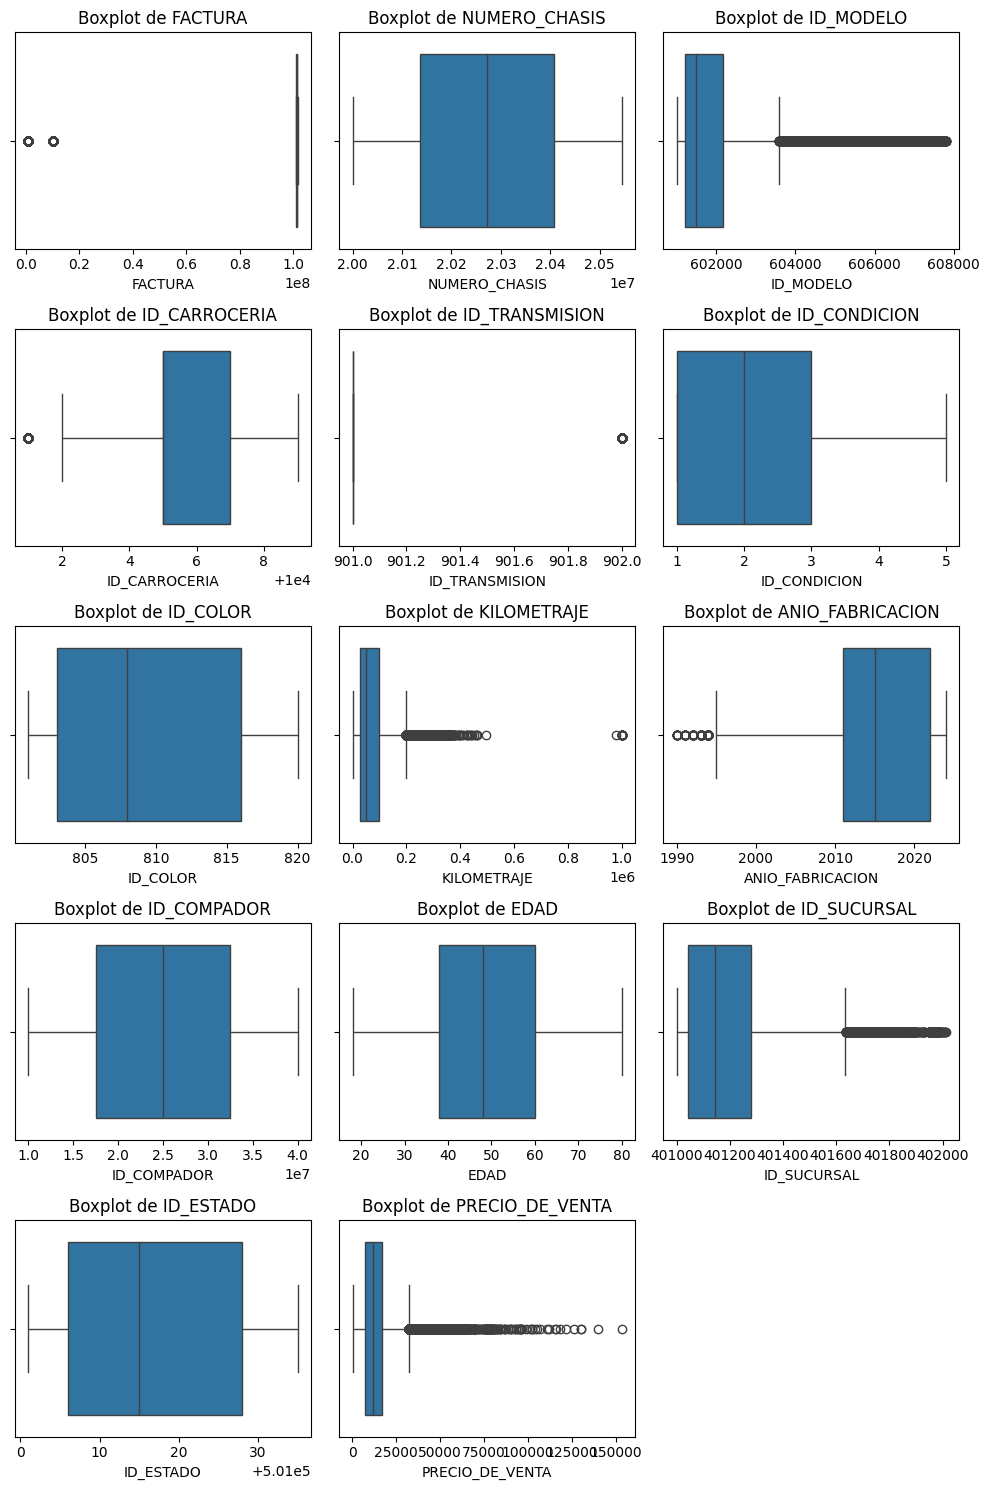

In [ ]:
numeric_columns = df_autos.select_dtypes(include=['int64', 'float64'])
# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 3*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df_autos[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()


**Conclusion de limpieza de datos**
No se identificaron valores nulos ni valores duplicados, sin embargo se identificaron gran cantidad de valores outliers. Muchos de ellos, como ID_MODELO o ID_SUCURSAL, seran eliminados en la etapa de preporcesameinto de datos, por ser variables que no aportan al modelo. Otros como PRECIO_DE_VENTA o KILOMETRAJE son variables en las que entedemos que los valores outlier son calves para entender el comportamiento del data set.

# **EDA: Análisis Exploratorio de datos**

**Graficos con Matplotlib**

In [ ]:
#1 Unidades por Genero

In [ ]:
#Definir los ejes
eje_x = df_autos['SEXO'].unique()
eje_y = df_autos.groupby("SEXO").count()["FACTURA"]

Text(0, 0.5, 'Unidades vendidas')

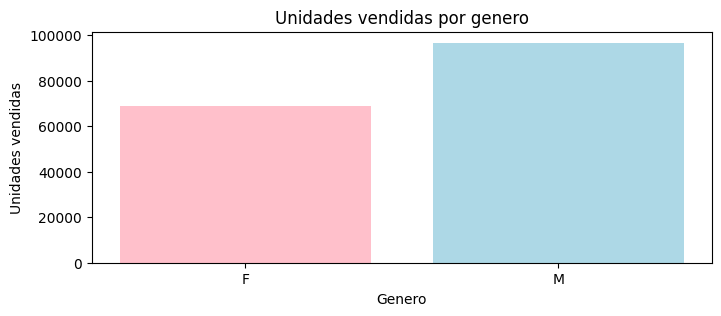

In [ ]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 3))

# Personalizar el gráfico
ax.bar(eje_x, eje_y, color=["pink", "lightblue"])
ax.set_title('Unidades vendidas por genero')
ax.set_xticks(eje_x)
ax.set_xlabel('Genero')
ax.set_ylabel('Unidades vendidas')

In [ ]:
#2 Ventas por rango de edad

Text(0, 0.5, 'Cantidad de Compradores')

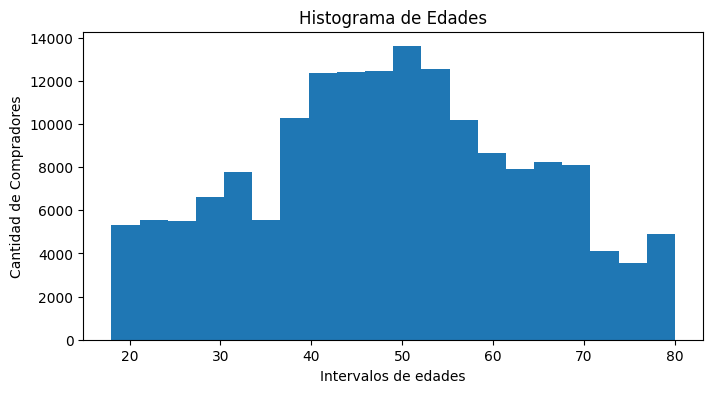

In [ ]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_autos['EDAD'], bins=20)

# Personalizar el gráfico
ax.set_title('Histograma de Edades')
ax.set_xlabel('Intervalos de edades')
ax.set_ylabel('Cantidad de Compradores')

In [ ]:
#3 Ventas Mensuales

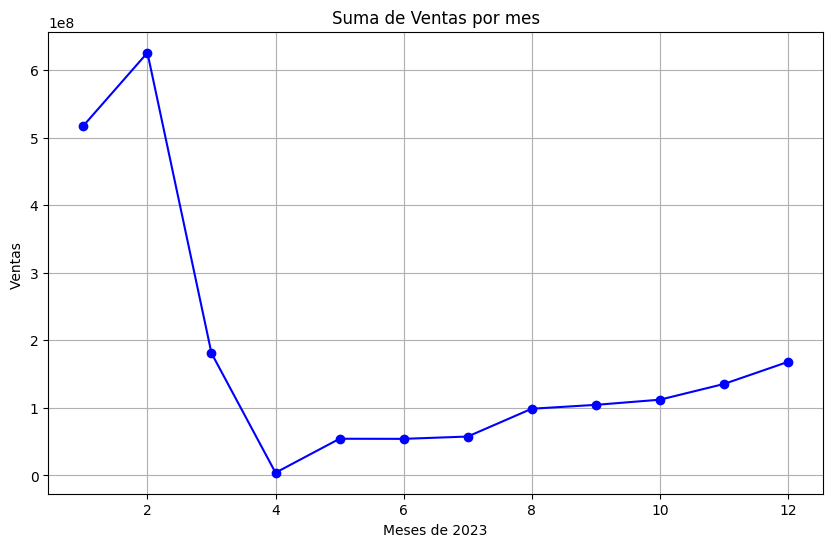

In [ ]:
#creo la variable mes para agrupar fechas
df_autos['Mes'] = df_autos['FECHA_DE_VENTA'].dt.month

#Agrupo las ventas por mes
df_grouped = df_autos.groupby('Mes')['PRECIO_DE_VENTA'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Mes'], df_grouped['PRECIO_DE_VENTA'], marker='o', linestyle='-', color='b')

# Personalizar el gráfico
plt.title('Suma de Ventas por mes')
plt.xlabel('Meses de 2023')
plt.ylabel('Ventas ')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [ ]:
#4 Ventas por tipo de carroceria

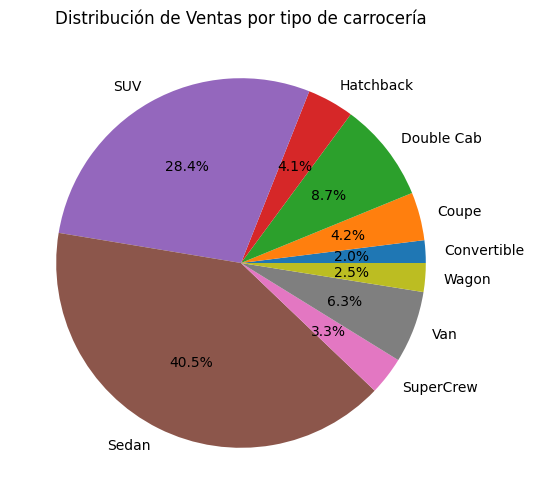

In [ ]:
#creo df agrupando ventas por carroceria
Carro = df_autos.groupby("CARROCERIA")['PRECIO_DE_VENTA'].sum().reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(Carro['PRECIO_DE_VENTA'], labels = Carro['CARROCERIA'], autopct='%1.1f%%')
# Ajustes adicionales
ax.set_title('Distribución de Ventas por tipo de carrocería')

# Mostrar el gráfico
plt.show()

**Graficos con Seaborn**

In [ ]:
#5 Unidades vendidas por condicion y año de fabricación

In [ ]:
##como puedo agrupar las condiciones y solo visualizar nuevos y usados?
Nuevo = df_autos[df_autos['ID_CONDICION'] == 1]
Usado = df_autos[df_autos['ID_CONDICION'] >= 2]

<Axes: xlabel='ANIO_FABRICACION', ylabel='Count'>

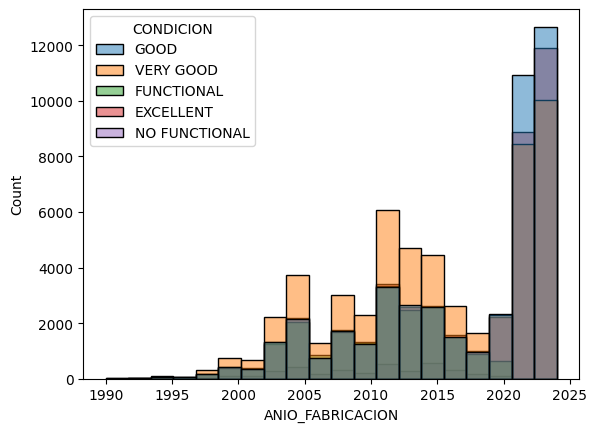

In [ ]:
sns.histplot(data=df_autos, x="ANIO_FABRICACION", hue="CONDICION", bins=20)

In [ ]:
#6 Unidades vendidas por genero y edad

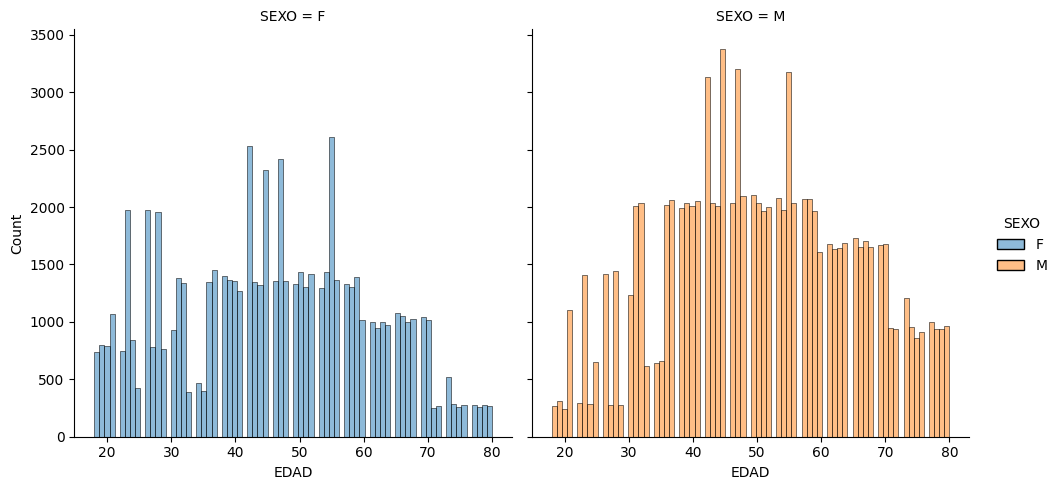

In [ ]:
sns.displot(df_autos, x="EDAD", hue="SEXO", col="SEXO")

In [ ]:
#7 Precio pagado por edad y por sexo

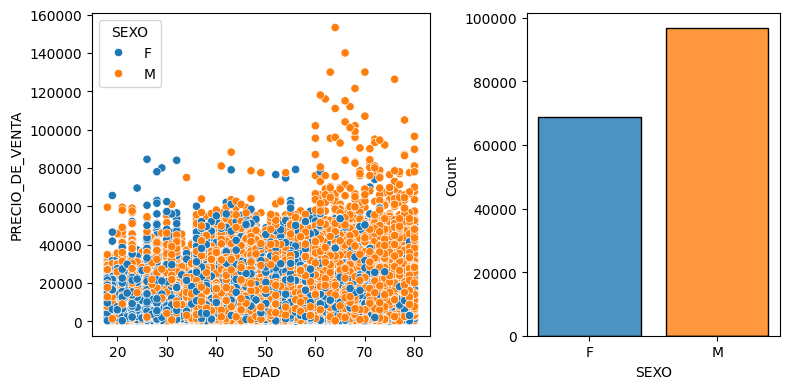

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df_autos, x="EDAD", y="PRECIO_DE_VENTA", hue="SEXO", ax=axs[0])
sns.histplot(data=df_autos, x="SEXO", hue="SEXO", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

In [ ]:
#8 Ventas mensuales por Sexo

<Axes: xlabel='Mes', ylabel='PRECIO_DE_VENTA'>

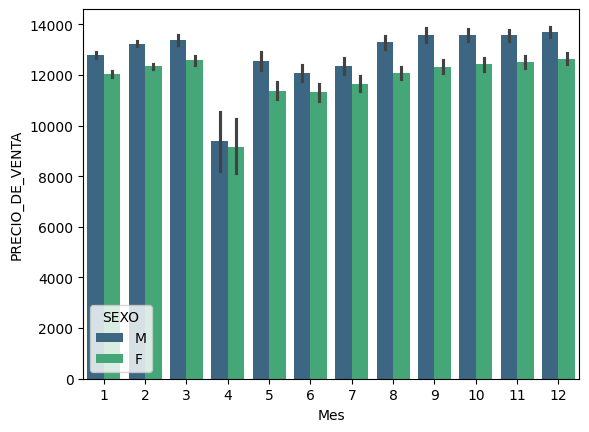

In [ ]:
sns.barplot(x="Mes", y="PRECIO_DE_VENTA", hue="SEXO", data=df_autos, palette="viridis")

In [ ]:
#9 Precio medio de venta

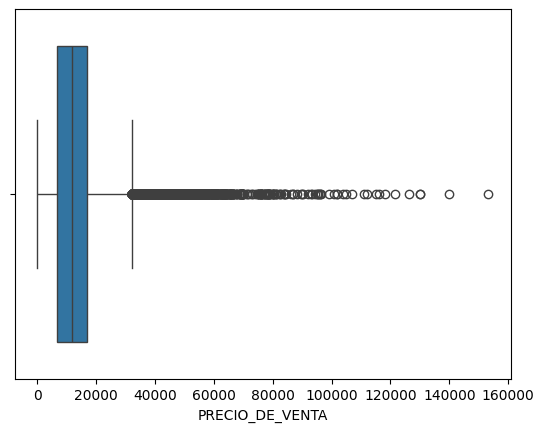

In [ ]:
ax = sns.boxplot(df_autos, x=df_autos['PRECIO_DE_VENTA'])

In [ ]:
#10 Precio medio por mes

<ipython-input-22-22976a192bd0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df_autos, x="Mes", y="PRECIO_DE_VENTA", palette="Set3")


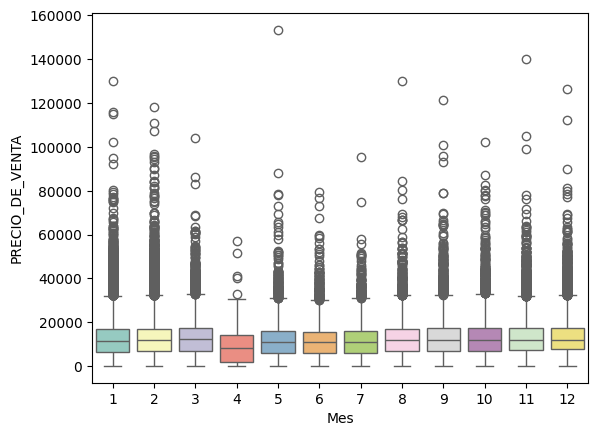

In [ ]:
ax = sns.boxplot(df_autos, x="Mes", y="PRECIO_DE_VENTA", palette="Set3")

<Axes: xlabel='ANIO_FABRICACION', ylabel='PRECIO_DE_VENTA'>

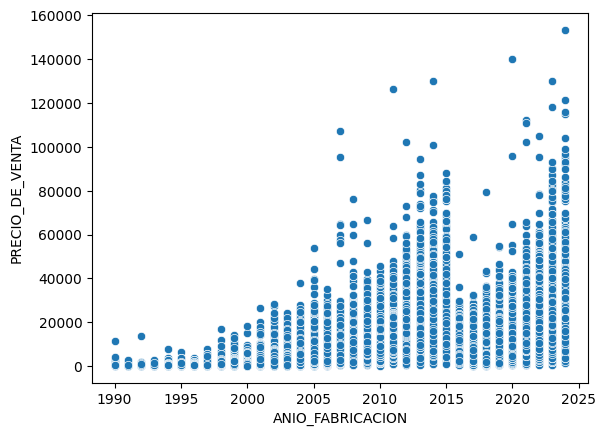

In [ ]:
#11 Correlacion Precio - Año de fabricacion y Kilometraje
sns.scatterplot(data=df_autos, x="ANIO_FABRICACION", y="PRECIO_DE_VENTA")

<Axes: xlabel='KILOMETRAJE', ylabel='PRECIO_DE_VENTA'>

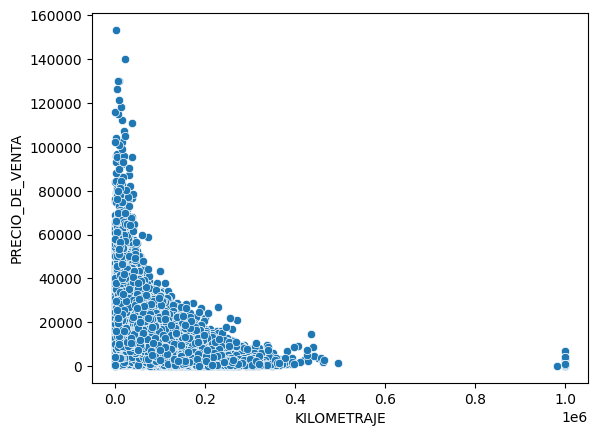

In [ ]:
sns.scatterplot(data=df_autos, x="KILOMETRAJE", y="PRECIO_DE_VENTA")

**Conclusiones del EDA**

El analisis de la variables demograficas, como edad y sexo, nos muestra que tienen relacion en la demanada pero no en el precio de ventas, por lo que quizas no debamos tenerlas en cuenta para el modelado.

El analisis del rango intercuartil del precio de las unidades, arroja muchos valores outliers. En este sentido inferimos que quizas el modelado no nos arroje resultados muy presisos dado que la variable objetivo es la que tiene dispersion.

Por ultimo, del analisis de correlacion podemos inferir que las variables mas influyentes en el precio, son el año de fabricacion en forma directa y la cantidad de kilometros recorridos en forma inversa.

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

In [ ]:
#Traemos todas las variables para ver cuales son categoricas

In [ ]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165576 entries, 0 to 165575
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FACTURA           165576 non-null  int64         
 1   NUMERO_CHASIS     165576 non-null  int64         
 2   ID_MODELO         165576 non-null  int64         
 3   MARCA             165576 non-null  object        
 4   MODELO            165576 non-null  object        
 5   LINEA             165576 non-null  object        
 6   ID_CARROCERIA     165576 non-null  int64         
 7   CARROCERIA        165576 non-null  object        
 8   ID_TRANSMISION    165576 non-null  int64         
 9   TRANSMISION       165576 non-null  object        
 10  ID_CONDICION      165576 non-null  int64         
 11  CONDICION         165576 non-null  object        
 12  ID_COLOR          165576 non-null  int64         
 13  COLOR_EXT         165576 non-null  object        
 14  KILO

In [ ]:
#Suprimir las variables categoricas, variables que hayan generado muchos valores outliers, o datos que no sumen inforacion util para el modelado:

DF_Modelado = df_autos.drop(['MARCA', 'MODELO', 'TRANSMISION', 'ID_CONDICION', 'LINEA', 'COLOR_EXT', 'SUCURSAL', 'ESTADO', 'ABREVIATURA', 'FACTURA', 'NUMERO_CHASIS', 'ID_SUCURSAL','FECHA_DE_VENTA', 'ID_COMPADOR', 'EDAD', 'SEXO', 'ID_CARROCERIA', 'ID_TRANSMISION', 'ID_COLOR'], axis=1)

In [ ]:
#Posteriormente, codificamos las variables categoricas valiosas para el modelo
DF_Modelado = pd.get_dummies(DF_Modelado, columns=['CARROCERIA', 'CONDICION'])

In [ ]:
DF_Modelado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165576 entries, 0 to 165575
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   ID_MODELO                165576 non-null  int64
 1   KILOMETRAJE              165576 non-null  int64
 2   ANIO_FABRICACION         165576 non-null  int64
 3   ID_ESTADO                165576 non-null  int64
 4   PRECIO_DE_VENTA          165576 non-null  int64
 5   CARROCERIA_Convertible   165576 non-null  bool 
 6   CARROCERIA_Coupe         165576 non-null  bool 
 7   CARROCERIA_Double Cab    165576 non-null  bool 
 8   CARROCERIA_Hatchback     165576 non-null  bool 
 9   CARROCERIA_SUV           165576 non-null  bool 
 10  CARROCERIA_Sedan         165576 non-null  bool 
 11  CARROCERIA_SuperCrew     165576 non-null  bool 
 12  CARROCERIA_Van           165576 non-null  bool 
 13  CARROCERIA_Wagon         165576 non-null  bool 
 14  CONDICION_EXCELLENT      165576 non-

In [ ]:
DF_Modelado.head()

,ID_MODELO,KILOMETRAJE,ANIO_FABRICACION,ID_ESTADO,PRECIO_DE_VENTA,CARROCERIA_Convertible,CARROCERIA_Coupe,CARROCERIA_Double Cab,CARROCERIA_Hatchback,CARROCERIA_SUV,CARROCERIA_Sedan,CARROCERIA_SuperCrew,CARROCERIA_Van,CARROCERIA_Wagon,CONDICION_EXCELLENT,CONDICION_FUNCTIONAL,CONDICION_GOOD,CONDICION_NO FUNCTIONAL,CONDICION_VERY GOOD
0,601001,16639,2015,501004,21500,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,601001,9393,2015,501004,21500,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,601005,5554,2015,501004,10900,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3,601010,14414,2024,501004,49750,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,601005,11398,2015,501004,14100,False,False,False,False,False,True,False,False,False,False,True,False,False,False


#**Feature Selection**

**Selección de variable objetivo y variables independientes**

In [ ]:
X = DF_Modelado.drop(['ID_MODELO','PRECIO_DE_VENTA' ], axis=1)
y = DF_Modelado['PRECIO_DE_VENTA']


In [ ]:
# Variables independientes
X.columns

Index(['KILOMETRAJE', 'ANIO_FABRICACION', 'ID_ESTADO',
       'CARROCERIA_Convertible', 'CARROCERIA_Coupe', 'CARROCERIA_Double Cab',
       'CARROCERIA_Hatchback', 'CARROCERIA_SUV', 'CARROCERIA_Sedan',
       'CARROCERIA_SuperCrew', 'CARROCERIA_Van', 'CARROCERIA_Wagon',
       'CONDICION_EXCELLENT', 'CONDICION_FUNCTIONAL', 'CONDICION_GOOD',
       'CONDICION_NO FUNCTIONAL', 'CONDICION_VERY GOOD'],
      dtype='object')

In [ ]:
# Variable dependiente
y.sample(10)

,PRECIO_DE_VENTA
106538,25500
29553,8500
112164,8900
41088,2600
75906,11700
110629,1800
153813,5500
49475,1000
162449,13500
75804,22800


# **Modelado**

**Librerias necesarias para implementar los modelos**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# **1.- Regresion Lineal**

**División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establecemo una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra (42).
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

**Predicción con conjunto de prueba**

In [ ]:
# Creo el objeto de regresión logistica.
model = LinearRegression()

# Entreno el modelo con mis datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)


**Evaluación del rendimiento del modelo**

In [ ]:
# Evaluar el modelo
mse_rl = mean_squared_error(y_test, y_pred)
r2_rl = r2_score(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)
mae_rl = mean_absolute_error(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse_rl}')
print(f'Coeficiente de determinación (R^2): {r2_rl}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_rl}')
print(f'Error Absoluto Medio (MAE): {mae_rl}')

Error cuadrático medio (MSE): 33872602.12412177
Coeficiente de determinación (R^2): 0.5229632704637559
Raíz del Error Cuadrático Medio (RMSE): 5820.017364589367
Error Absoluto Medio (MAE): 3938.361249681689


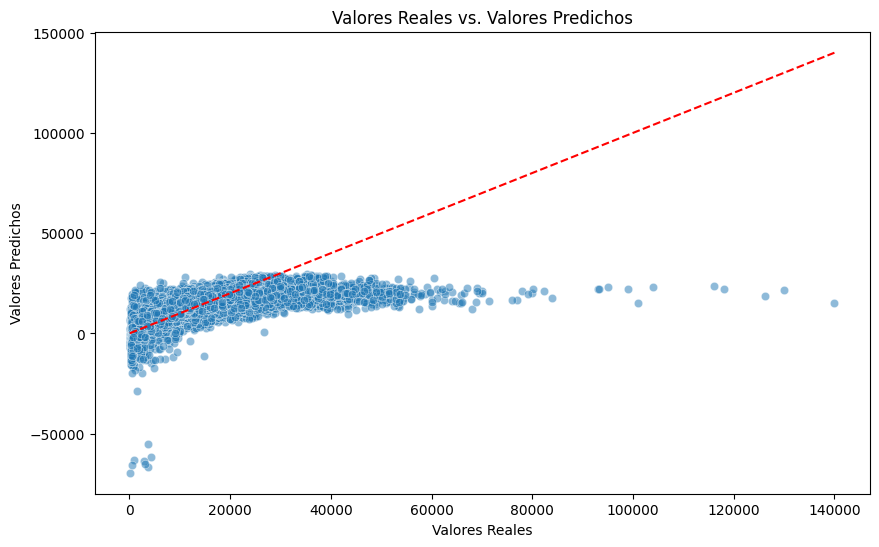

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

# **2.-KNN**

**Predicción con conjunto de prueba**

In [ ]:
#instacionamos el modelo
model = KNN(n_neighbors=20, weights="uniform",metric="manhattan")

In [ ]:
#entrenamos el modelo
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=20)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

**Evaluación del rendimiento del modelo**

In [ ]:
# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse_knn}')
print(f'Coeficiente de determinación (R^2): {r2_knn}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_knn}')
print(f'Error Absoluto Medio (MAE): {mae_knn}')

Error cuadrático medio (MSE): 41833046.51946948
Coeficiente de determinación (R^2): 0.4108542465955386
Raíz del Error Cuadrático Medio (RMSE): 6467.847131733208
Error Absoluto Medio (MAE): 4484.531215147062


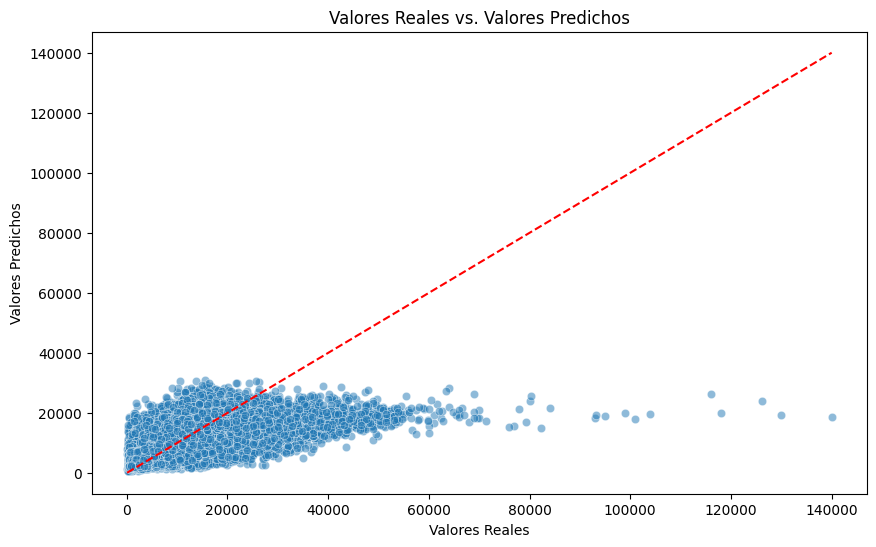

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

# **3.-RANDOM FOREST**

**Predicción con conjunto de prueba**

In [ ]:
#instacionamos el modelo
model = RF(n_estimators=10, random_state=42)

In [ ]:
#entrenamos el modelo
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

**Evaluación del rendimiento del modelo**

In [ ]:
# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse_rf}')
print(f'Coeficiente de determinación (R^2): {r2_rf}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_rf}')
print(f'Error Absoluto Medio (MAE): {mae_rf}')

Error cuadrático medio (MSE): 31690304.579813704
Coeficiente de determinación (R^2): 0.5536971384906927
Raíz del Error Cuadrático Medio (RMSE): 5629.414230611716
Error Absoluto Medio (MAE): 3635.3369316760186


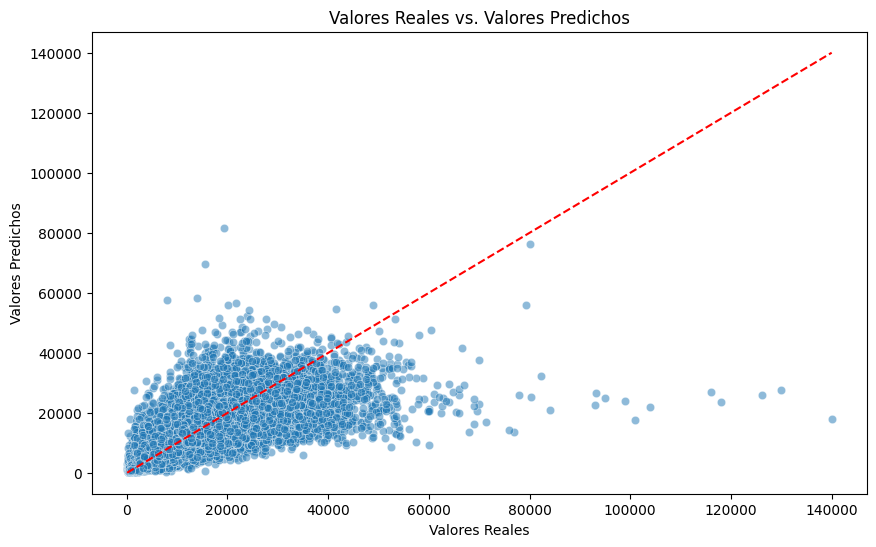

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

# **Conclusiones Finales**

In [ ]:
#REDONDEO VALORES DE LA METRICA PARA COMPARAR SU PORCENTAJE DE EFICACIA

In [ ]:
print(f'RESULTADO REGRESION LINEAL: {r2_rl*100//1}%')
print(f'RESULTADO KNN: {r2_knn*100//1}%')
print(f'RESULTADO RANDOM FOREST: {r2_rf*100//1}%')

RESULTADO REGRESION LINEAL: 52.0%
RESULTADO KNN: 41.0%
RESULTADO RANDOM FOREST: 55.0%



A través del análisis comparativo, se ha determinado que el algoritmo **Random Forest** es el más eficaz para predecir el precio de los automóviles basándose en los atributos de cada unidad, alcanzando un **55%** de precisión. Este resultado se obtuvo tras un exhaustivo análisis exploratorio del conjunto de datos, donde se descartaron variables que no mostraban una relación directa con la variable objetivo, "precio de venta", mediante el uso de gráficos de correlación y otras métricas.

Además, la eliminación de outliers, ajustada mediante un proceso iterativo, contribuyó significativamente a la reducción de la dimensionalidad del dataset y mejoró el rendimiento del algoritmo predictivo. Finalmente, tras probar diversos algoritmos y técnicas, se concluye que **Random Forest** es el que mejor se adapta a la estructura del dataset, como lo demuestran los resultados obtenidos.
